Confusion matrix =  [[    0     0]
 [  100 10000]]
F1 Score =  0.9950248756218906
Accuracy Score =  0.9900990099009901


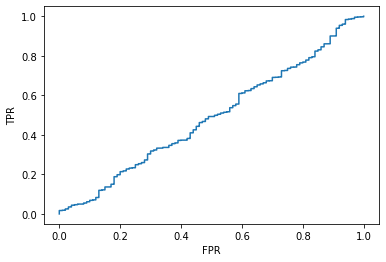

Area under Curve = 0.48829900000000004


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('5_a.csv')
ori = np.array(df['proba'])
pre = np.array(df['proba'])
act = np.array(df['y'])
TP = 0;TN = 0;FP=0;FN=0
for i in range(len(pre)):
    if pre[i] > 0.5:
        pre[i]= 1
    else:
        pre[i] = 0
df['proba'] = pre
pred_positive_points = len(df[df['proba']==1])
pred_negative_points = len(df[df['proba']==0])
act_positive_points = len(df[df['y']==1])
act_negative_points = len(df[df['y']==0])
#Part 1
for i in range(len(pre)):
    if pre[i]==1 and act[i]==1:
        TP+= 1
    elif pre[i]==0 and act[i]==0:
        TN+= 1
    elif pre[i]==0 and act[i]==1:
        FN+= 1
    elif pre[i]==1 and act[i]==0:
        FP+= 1
CF_matrix = np.array([[TN,FN],[FP,TP]])
print("Confusion matrix = ",CF_matrix)

#Part 2 
Prec = TP/(TP+FP)
Re = TP/(TP+FN)
F1 = (2*Prec*Re)/(Prec+Re)
print("F1 Score = ",F1)

#Part 4
Accuracy_Score = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy Score = ",Accuracy_Score)

#Part 3
TPR=[];FPR=[]
d = {ori[i]:act[i] for i in range(len(ori))}
e = sorted(d.keys(),reverse=True)
for i in range(len(act)):
    c=[];TP1=0;FP1=0
    for j,k in enumerate(e):
        if e[i] <= e[j]:
            c.append(1)
        else:
            c.append(0)
    for l in range(len(c)):
        if c[l]==1 and d[e[l]]==1:
            TP1+= 1
        elif c[l]==1 and d[e[l]]==0:
            FP1+= 1
    TPR.append(TP1/act_positive_points)
    FPR.append(FP1/act_negative_points)
AUC = np.trapz(TPR,FPR)
plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print("Area under Curve =",AUC)

Part B

Confusion matrix =  [[9761   45]
 [ 239   55]]
F1 Score =  0.2791878172588833
Accuracy Score =  0.9718811881188119


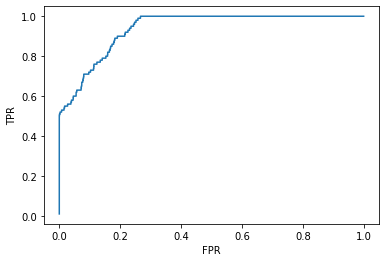

Area under Curve = 0.9377570000000001


In [3]:
df = pd.read_csv('5_b.csv')
ori = np.array(df['proba'])
pre = np.array(df['proba'])
act = np.array(df['y'])
TP = 0;TN = 0;FP=0;FN=0
for i in range(len(pre)):
    if pre[i] > 0.5:
        pre[i]= 1
    else:
        pre[i] = 0
df['proba'] = pre
pred_positive_points = len(df[df['proba']==1])
pred_negative_points = len(df[df['proba']==0])
act_positive_points = len(df[df['y']==1])
act_negative_points = len(df[df['y']==0])
#Part 1
for i in range(len(pre)):
    if pre[i]==1 and act[i]==1:
        TP+= 1
    elif pre[i]==0 and act[i]==0:
        TN+= 1
    elif pre[i]==0 and act[i]==1:
        FN+= 1
    elif pre[i]==1 and act[i]==0:
        FP+= 1
CF_matrix = np.array([[TN,FN],[FP,TP]])
print("Confusion matrix = ",CF_matrix)

#Part 2 
Prec = TP/(TP+FP)
Re = TP/(TP+FN)
F1 = (2*Prec*Re)/(Prec+Re)
print("F1 Score = ",F1)

#Part 4
Accuracy_Score = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy Score = ",Accuracy_Score)

#Part 3
TPR=[];FPR=[]
d = {ori[i]:act[i] for i in range(len(ori))}
e = sorted(d.keys(),reverse=True)
for i in range(len(act)):
    c=[];TP1=0;FP1=0
    for j,k in enumerate(e):
        if e[i] <= e[j]:
            c.append(1)
        else:
            c.append(0)
    for l in range(len(c)):
        if c[l]==1 and d[e[l]]==1:
            TP1+= 1
        elif c[l]==1 and d[e[l]]==0:
            FP1+= 1
    TPR.append(TP1/act_positive_points)
    FPR.append(FP1/act_negative_points)
AUC = np.trapz(TPR,FPR)
plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print("Area under Curve =",AUC)    

Part C

In [6]:
import numpy as np
import pandas as pd
df = pd.read_csv('5_c.csv')
ori = np.array(df['prob'])
pre = np.array(df['prob'])
act = np.array(df['y'])
TP = 0;TN = 0;FP=0;FN=0
d = {ori[i]:act[i] for i in range(len(ori))}
e = sorted(d.keys(),reverse=True)
A=np.empty(len(e))
for i in range(len(e)):
    c=[];FP1=0;FN1=0
    for j,k in enumerate(e):
        if e[i] <= e[j]:
            c.append(1)
        else:
            c.append(0)
    for l in range(len(c)):
        if c[l]==1 and d[e[l]]==0:
            FP1+= 1
        elif c[l]==0 and d[e[l]]==1:
            FN1+= 1
    A[i]= 500*FN1+100*FP1
print("Lowest value of metric A =",A.min())
print("Best Threshold corresponding to Amin = ",e[A.argmin()])
for i in range(len(pre)):
    if pre[i] > e[A.argmin()]:
        pre[i]= 1
    else:
        pre[i] = 0
df['pre']= pre

Lowest value of metric A = 140000.0
Best Threshold corresponding to Amin =  0.250403339798386


Part D

In [21]:
import numpy as np
import pandas as pd
df = pd.read_csv('5_d.csv')
act = np.array(df['y'])
pre = np.array(df['pred'])
#Part 1
s = 0
for i in range(len(act)):
        s = s + (act[i]-pre[i])*(act[i]-pre[i])
mean_square_error = s/len(act)
print("mean_square_error = ",mean_square_error)

#Part 2
t = 0;a = 0
for i in range(len(act)):
    t = t + abs(act[i]-pre[i])
    a = a + act[i]
MAPE = t/a
print("Mean absolute Percentage Error = ",MAPE)

#Part 3
total = 0
mean_act = a/len(act)
for i in range(len(act)):
    total = total + (act[i]-mean_act)*(act[i]-mean_act)
R2 = 1 - s/total
print("Coefficient of Determination = ",R2)
    

mean_square_error =  177.16569974554707
Mean absolute Percentage Error =  0.1291202994009687
Coefficient of Determination =  0.9563582786990964
